# DANDI Notebook: Exploring Dandiset 001276

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Users should be cautious when interpreting the code or results.

This notebook demonstrates how to explore and analyze Dandiset 001276, which contains data from
"NG-CANCAN Remote Targeting Electroporation: Impact of Burst Number Variation on Permeabilization Distribution in Confluent Cell Monolayers".

The experiments were conducted using a four-electrode array with an inter-electrode distance of 10.0 mm.
The study focused on optimizing the CANCAN protocol and investigating the effect of varying burst numbers
on permeabilization distribution across confluent cell monolayers.
The CANCAN protocols utilized canceling pulses to minimize cell damage near the electrodes while targeting
cells in the center of the electrode array. Each single pulse in the protocol had a duration of 600 ns.
The protocol consisted of nine packets of pulses delivered at a frequency of 0.2 MHz and was repeated 1, 2, 4, or 6 times at a frequency of 1 Hz.
Cell monolayer integrity was assessed using Hoechst staining, while membrane permeability was evaluated using YoPro-1.

## Accessing the Dandiset

First, you'll need to install the `dandi` and `lindi` Python packages. You can install these packages using pip:

```bash
pip install dandi lindi pynwb
```

Now, let's use the DANDI API to list all of the assets in the Dandiset.

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001276")
assets = list(dandiset.get_assets())
print(f"Number of assets in the dandiset: {len(assets)}")

Number of assets in the dandiset: 108


## Exploring an NWB File

Let's explore one of the NWB files in this Dandiset. We will load the file and display some of its contents.
In this example, we picked the first NWB file, but you can choose any file from the list of assets above.
Note that this process may take a few minutes, so please be patient.

The `nwb_file_info` tool provided the following code to load the NWB file:

```python
import pynwb
import lindi
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001276/assets/95141d7a-82aa-4552-940a-1438a430a0d7/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()
```

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Image shape: (1, 19190, 19190)
Image dtype: uint16
Image max: 65535
Image min: 0


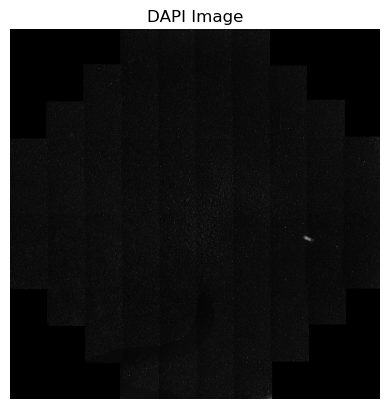

In [2]:
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np

# Load the NWB file
try:
    f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001276/assets/95141d7a-82aa-4552-940a-1438a430a0d7/nwb.lindi.json")
    nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

    # Get the SingleTimePointImaging data
    SingleTimePointImaging = nwb.acquisition["SingleTimePointImaging"]
    image_data = SingleTimePointImaging.data[:]

    # Print some basic information about the image
    print(f"Image shape: {image_data.shape}")
    print(f"Image dtype: {image_data.dtype}")
    print(f"Image max: {np.max(image_data)}")
    print(f"Image min: {np.min(image_data)}")

    # Plot the image
    if image_data.shape == (1, 19190, 19190):
        image_data = image_data[0, :, :]
    elif image_data.shape != (19190, 19190):
        raise ValueError(f"Unexpected image shape: {image_data.shape}")
    plt.imshow(image_data, cmap='gray')
    plt.title("DAPI Image")
    plt.axis('off') # removes the axes
    plt.savefig("dapi_image.png")
    plt.show()

except Exception as e:
    print(f"Error loading or processing NWB file: {e}")

The plot shows an image of cells stained with DAPI, captured with a 4x objective. The cells are in a monolayer.
The image edges are occluded, and some stitching artifacts are visible.

This is just a starting point for exploring this Dandiset. You can use the code in this notebook as a template
for loading and visualizing other data in the Dandiset.